<hr>
Este material ha sido construido en conjunto con material suministrado por los profesores Pedro Atencio (Instituto Tecnológico Metropolitano), Carlos Mera (Universidad de Medellin), Albeiro Espinosa y Diego Patiño (Universidad Nacional de Colombia, Sede Medellín); a ellos les damos crédito.
<hr>

#  <center> VISIÓN ARTIFICIAL </center>
## Agenda del día


### Unidad 2 - Adquisición de imágenes
<ul>
  <li>**La luz, el espectro electromagnético y la percepción visual**</li>
    <li>Formación y adquisición de imágenes digitales.</li>
</ul>


# Unidad 2 - Adquisición de imágenes
<hr>

## 1. La luz, el espectro electromagnetico y la percepcion visual
<br>
Se llama Luz (del latín lux, lucis) a la parte de la onda electromagnética que puede ser percibida por el ojo humano. Esta onda (en su parte visible) está compuesta por partículas energizadas llamadas fotones, cuya frecuencia o energía determina su color.
<br>
<br>
Las ondas visibles del Espectro Electromagnético forman parte de una estrecha franja que va desde longitudes de onda electromagnéticas que emiten fuentes luminosas, que corresponden desde los 380 nm (violeta) hasta los 780 nm (rojo). Los colores del espectro se ordenan como en el arco iris, formando el llamado espectro visible.
<br><br>
Sin embargo, la luz no es (normalmente) un simple punto en este rango, sino que se forma combinando un poco de cada frecuencia. En este sentido, los colores que percibimos no son más que sensaciones que el ojo humano interpreta ante diferentes vibraciones de los fotones.
<br><br>
De hecho, una banda de color es un rango de longitudes de ondas sobre el cual los sensores (*i.e.,* ojos, lentes...) que usamos para capturar una imagen tienen una sensibilidad diferente a 0. Una imagen típica está conformada por tres bandas de color, lo que significa que fue tomada por tres conjuntos distintos de sensores, cada uno con su propia función de sensibilidad. En la siguiente sesión hablaremos más del proceso de adquisición de una imagen.
<hr>

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
from skimage import data, filters, util, io
from skimage.morphology import disk

/usr/lib/python3/dist-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


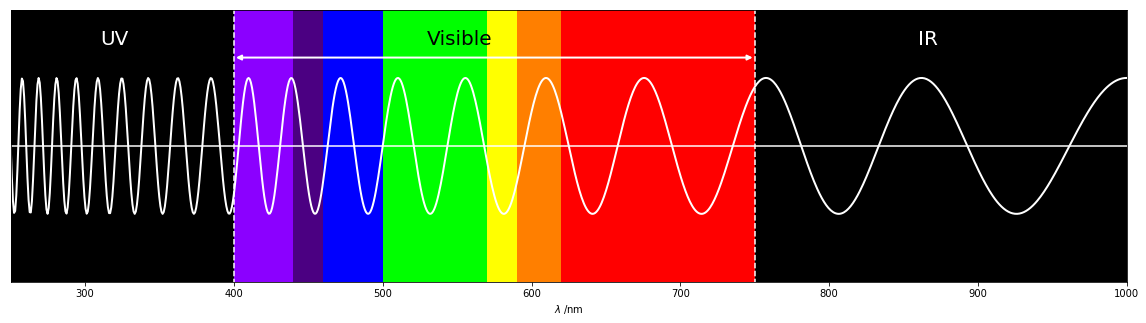

In [2]:
#Espectro Electromagnético
#A continuacion se construye un esquema del espectro electromagnetico
#Las unidades de la longitud de onda 'lambda' esta en nanometros [nm]

# wavelength range, nm, se definen las longitudes de onda máxima y mínima.
lmin, lmax = 250, 1000
#Vector de valores entre la longitud de onda mínima y la máxima, con mil espacios entre ellos
x = np.linspace(lmin, lmax, 1000)
# A wave with a smoothly increasing wavelength, una función de onda que incrementa su lambda (longitud de onda)
wv = (np.sin(10 * np.pi * x / (lmax+lmin-x)))[::-1]
#Crear la figura donde se mostrará la imagen
fig = plt.figure(figsize=(20,5))
ax = fig.add_subplot(111, axisbg='k')
ax.plot(x, wv, c='w', lw=2)
#Valor mínimo y máximo en el eje x & y
ax.set_xlim(250,1000)
ax.set_ylim(-2,2)
#Label and delimit the different regions of the electromagnetic spectrum
#Límites para el ultravioleta
ax.text(310, 1.5, 'UV', color='w', fontdict={'fontsize': 20})
#Define el espectro visible a partir de los 400nm hasta los 750nm
ax.text(530, 1.5, 'Visible', color='k', fontdict={'fontsize': 20})
ax.annotate('', (400, 1.3), (750, 1.3), arrowprops={'arrowstyle': '<|-|>',
                                                    'color': 'w', 'lw': 2})
#Límites para el infrarrojo
ax.text(860, 1.5, 'IR', color='w', fontdict={'fontsize': 20})
#Líneas punteadas blancas que separan el UV y el IR del visible.
ax.axvline(400, -2, 2, c='w', ls='--')
ax.axvline(750, -2, 2, c='w', ls='--')
# Eje horizontal que atraviesa a la función de onda
ax.axhline(c='w')
# No mostrar el eje Y, nombrar el eje X
ax.yaxis.set_visible(False)
ax.set_xlabel(r'$\lambda\;/\mathrm{nm}$')

# Agregar los rectángulos de distinto color para representar el espectro visible
# Diccionario que mapea las longitudes de onda (en nanómetros) en sus valores aproximados en RGB
rainbow_rgb = { (400, 440): '#8b00ff', (440, 460): '#4b0082',
                (460, 500): '#0000ff', (500, 570): '#00ff00',
                (570, 590): '#ffff00', (590, 620): '#ff7f00',
                (620, 750): '#ff0000'}
for wv_range, rgb in rainbow_rgb.items():
    ax.axvspan(*wv_range, color=rgb, ec='none', alpha=1)
#Mostrar la imagen que se creó con la libreria matplotlib
plt.show()

<center><a href='http://scipython.com/book/chapter-7-matplotlib/examples/a-depiction-of-the-electromagnetic-spectrum/'>Fuente del codigo</a></center>

<hr>
Según su longitud de onda (en orden creciente) y frecuencia (decreciente), podemos distinguir entre:
<ul>
<li>Rayos Gamma</li>
<li>Rayos X</li>
<li>Rayos Ultravioleta</li>
<li>Luz visible</li>
<li>Rayos Infrarrojos</li>
<li>Microondas</li>
</ul>
<br>
… y las utilizadas para transmitir las señales de televisión y de radio
<br><br>
<center><i>Figura. Espectro electromagnetico vs aplicaciones.</i></center>
<img src="res/m1_2/espectro.png" alt="espectro electromagnetico" style="height:600px">
<br><br>
Para diferentes aplicaciones de inspección visual o procesamiento de imagenes, se utilizan diferentes porciones del espectro electromagnético:
<hr>

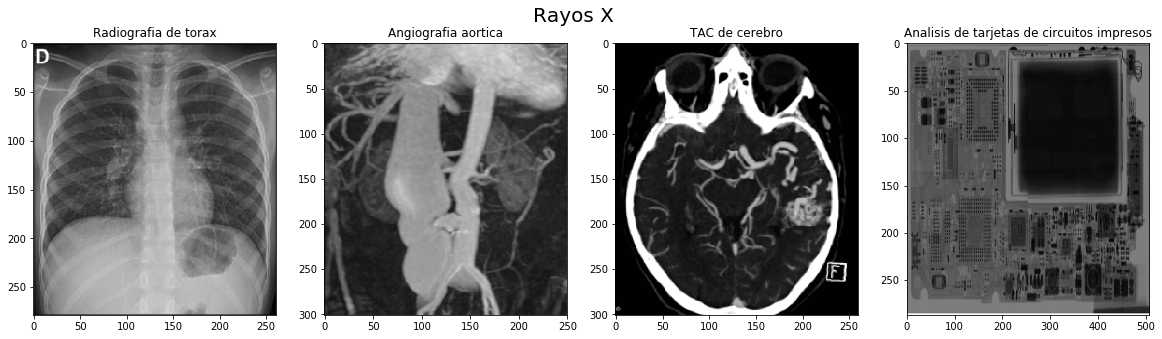

In [3]:
#Lectura de imágenes con Skimage  
I1 = io.imread('res/m1_2/rx_1.png')
I2 = io.imread('res/m1_2/rx_2.png')
I3 = io.imread('res/m1_2/rx_3.png')
I4 = io.imread('res/m1_2/rx_4.png')
#Generar las figuras para posteriormente plotear las imágenes que se leyeron
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1,4, figsize=(20, 5))
#Título general de las figuras
fig.suptitle('Rayos X', fontsize=20)
#El título de cada figura por separado se indica con set_title
#La función imshow permite mostrar la imagen en la figura que se indique (i.e. ax1, ax2, ax3, ax4)
ax1.set_title('Radiografia de torax')
ax1.imshow(I1, cmap='gray', aspect='auto')
ax2.set_title('Angiografia aortica')
ax2.imshow(I2, cmap='gray', aspect='auto')
ax3.set_title('TAC de cerebro')
ax3.imshow(I3, cmap='gray', aspect='auto')
ax4.set_title('Analisis de tarjetas de circuitos impresos')
ax4.imshow(I4, cmap='gray', aspect='auto')

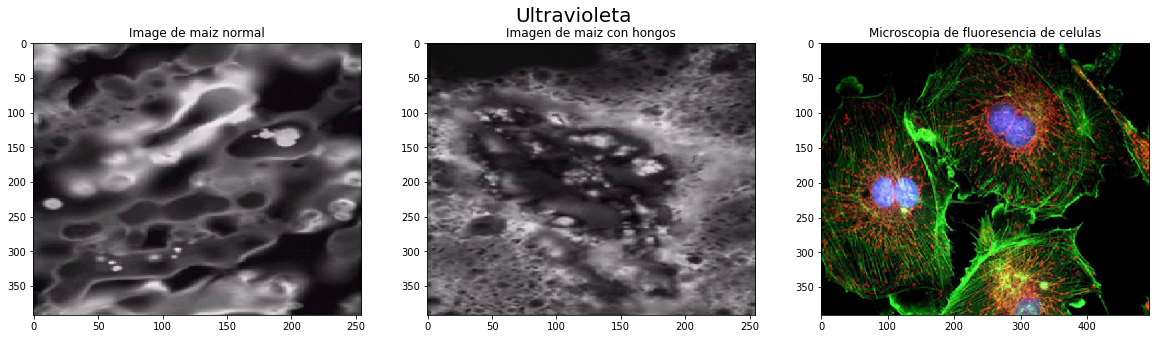

In [4]:
#Lectura de imágenes con Skimage
I1 = io.imread('res/m1_2/uv_1.png')
I2 = io.imread('res/m1_2/uv_2.png')
I3 = io.imread('res/m1_2/uv_3.png')
#Generar las figuras para posteriormente mostrar las imágenes que se leyeron
#Se muestran 3 imágenes por tanto se crea un subplot de 1x3
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(20, 5))
#Título para las figuras
fig.suptitle('Ultravioleta', fontsize=20)
#Título individual para cada figura, se muestran con imshow
ax1.set_title('Image de maiz normal')
ax1.imshow(I1, cmap='gray', aspect='auto')
ax2.set_title('Imagen de maiz con hongos')
ax2.imshow(I2, cmap='gray', aspect='auto')
ax3.set_title('Microscopia de fluoresencia de celulas')
ax3.imshow(I3, cmap='gray', aspect='auto')

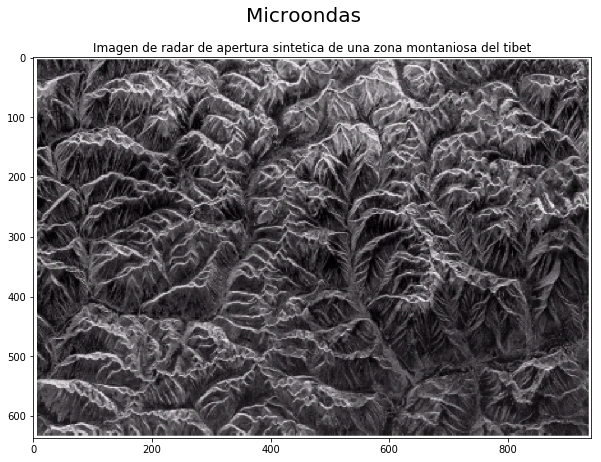

In [5]:
#Se lee la imagen
I1 = io.imread('res/m1_2/mo_1.png')
#En este caso se muestra una sola imagen, por tanto NO se usa subplot
fig = plt.figure(figsize=(10,7))
#Titulo de la figura
fig.suptitle('Microondas', fontsize=20)
#Titulo de la imagen
plt.title('Imagen de radar de apertura sintetica de una zona montaniosa del tibet')
#Se muestra la imagen
plt.imshow(I1, cmap='gray', aspect='auto')
plt.show()

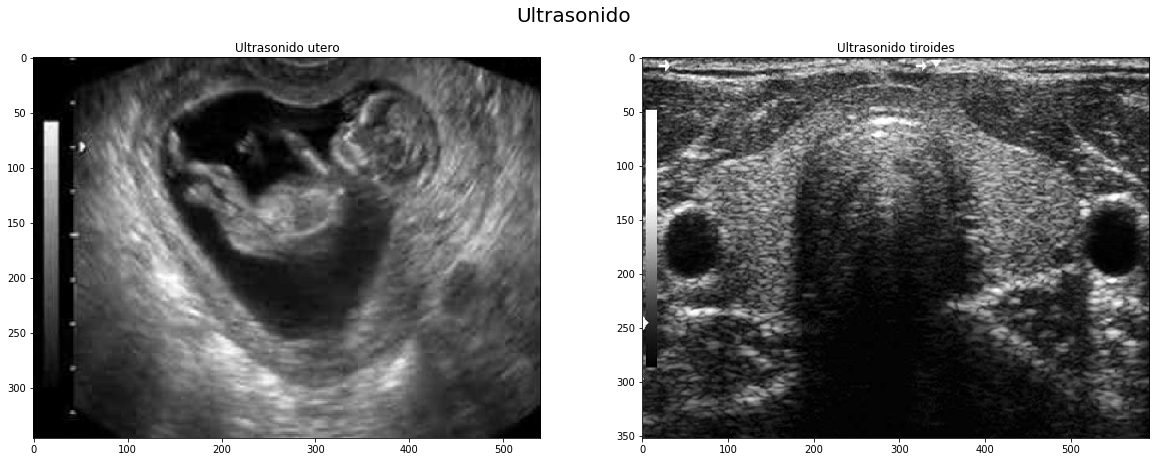

In [6]:
#Lectura de las imágenes
I1 = io.imread('res/m1_2/us_1.png')
I2 = io.imread('res/m1_2/us_2.png')
#Se crea un subplot 1x2
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20, 7))
#Se le coloca título a la figura, título a cada imagen y se plotean
fig.suptitle('Ultrasonido', fontsize=20)
ax1.set_title('Ultrasonido utero')
ax1.imshow(I1, cmap='gray', aspect='auto')
ax2.set_title('Ultrasonido tiroides')
ax2.imshow(I2, cmap='gray', aspect='auto')

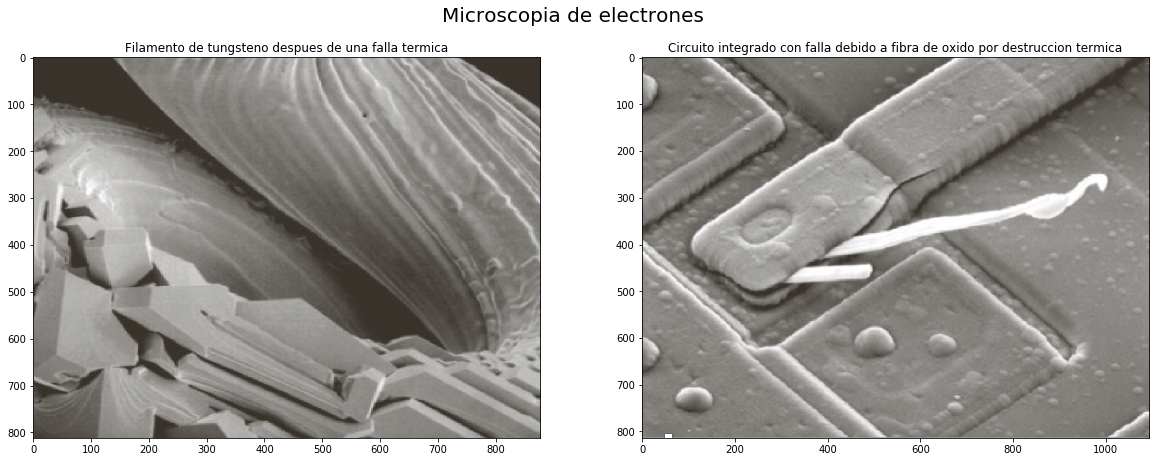

In [7]:
#Lectura de imágenes
I1 = io.imread('res/m1_2/em_1.png')
I2 = io.imread('res/m1_2/em_2.png')
#Se crea un subplot 1x2
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20, 7))
#Se le coloca título a la figura, título a cada imagen y se plotean
fig.suptitle('Microscopia de electrones', fontsize=20)
ax1.set_title('Filamento de tungsteno despues de una falla termica')
ax1.imshow(I1, cmap='gray', aspect='auto')
ax2.set_title('Circuito integrado con falla debido a fibra de oxido por destruccion termica')
ax2.imshow(I2, cmap='gray', aspect='auto')

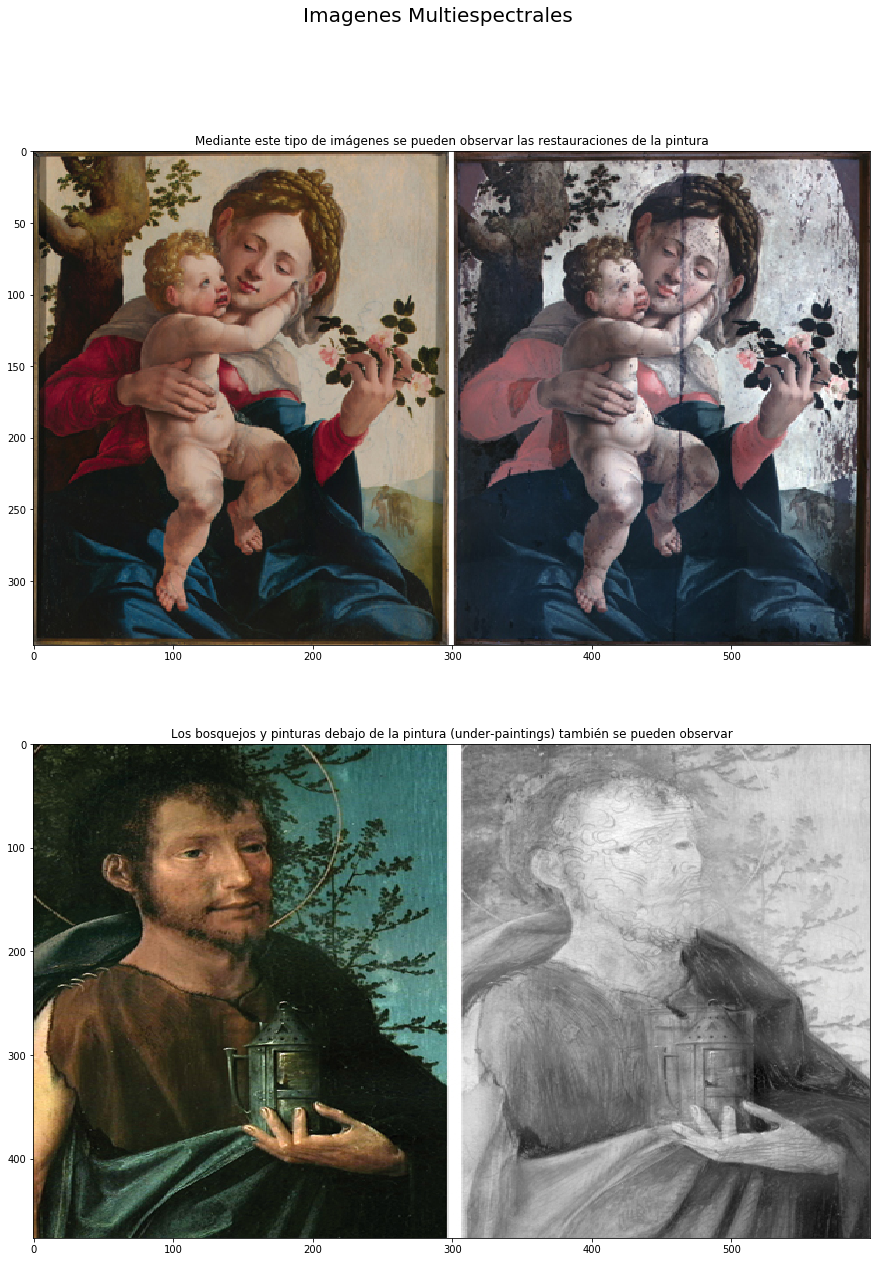

In [8]:
#Lectura de imágenes
I1 = io.imread('res/m1_2/ms_1.jpg')
I2 = io.imread('res/m1_2/ms_2.jpg')
#Se crea un subplot 2x1, esta orientación es vertical
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(15,20))
#Se le coloca título a la figura, título a cada imagen y se plotean
fig.suptitle('Imagenes Multiespectrales', fontsize=20)
ax1.set_title('Mediante este tipo de imágenes se pueden observar las restauraciones de la pintura')
ax1.imshow(I1, cmap='gray', aspect='auto')
ax2.set_title('Los bosquejos y pinturas debajo de la pintura (under-paintings) también se pueden observar')
ax2.imshow(I2, cmap='gray', aspect='auto')


## Sistema de percepcion visual humano (algunos conceptos)
<hr>
<br>
<ul>
<li>La Percepción Visual es un proceso activo con el cual el cerebro puede transformar la información lumínica captada por el ojo en una recreación de la realidad externa.</li>
<li>En el ojo humano, la luz visible es absorbida por el cristalino, que actúa como lente, y se proyecta en la retina. En este proceso la información luminosa 3D es proyectada en un plano 2D (la imagen)</li>
</ul>
<center><i>Figura. Esquema basico del ojo y la percepcion.</i></center>
<img src="res/m1_2/esquema_visual.png" alt="Esquema visual" style="height:300px">

<br><br>
La percepcion visual presenta sesgos reforzados evolutivamente, los cuales brindan ventajas de supervivencia. Estos sesgos sensoriales, y en este caso visuales, son involuntarios. A continuación un ejemplo:
<center><i>Figura. Sesgo perceptual: El gris de los círculos es el mismo, sin embargo el de la derecha se puede apreciar un poco rosado. <a href='https://purveslab.net/see-for-yourself/'>vealo por usted mismo</a></i></center>
<img src="res/m1_2/fx_1.png" alt="Efecto perceptual" style="height:400px">

<br><br>
El reconocimiento de patrones es una tarea constante del sistema perceptual humano, siendo de una complejidad mayor en el sistema visual. Segun <b>Lucas Sjulson</b> (Profesor asistente de investigación en el Instituto de Neurociencia Langone de la Universidad de Nueva York):
<ul>
<li>"una cosa importante a recordar es que toda percepción sensorial en los seres humanos son alucinaciones limitadas por la información sensorial."</li>
<li>La gente piensa que el globo ocular es una cámara, pero no es una cámara." Los ojos permiten ver, pero el cerebro, en última instancia da sentido a lo que se ve."</li>
<li>"El cerebro evolucionó durante largos períodos de tiempo para resolver problemas, y lo hace de una manera muy optimizada. Las cosas se aprenden con el desarrollo humano a través de la evolución y luego también a través de la experiencia visual."</li>
</ul>
<br>
<center><i>Figura. Reconocimiento de patrones: aunque la imagen esta compuesta de multiples objetos, en su totalidad es reconocida como un rostro. <a href='https://en.wikipedia.org/wiki/Prosopagnosia'>Prosopagnosia.</a></i></center>
<img src="res/m1_2/quijote.png" alt="Efecto perceptual" style="height:500px">
<br><br>
¿Es posible generar estos efectos perceptuales en la máquina? ¿Podemos hacer que la máquina perciba?: <a href='https://photos.google.com/share/AF1QipPX0SCl7OzWilt9LnuQliattX4OUCj_8EP65_cTVnBmS1jnYgsGQAieQUc1VQWdgQ?key=aVBxWjhwSzg2RjJWLWRuVFBBZEN1d205bUdEMnhB'>DeepDream</a>
<hr>

## Conclusiones
<ul>
<li>El espectro electromagnético se refiere a una porción o conjunto de longitudes que pueden tomar las ondas electromagnéticas.</li>
<li>La porción visible (para los humanos) del espectro electromagnético es solo una pequeña parte del mismo, conformada por las longitudes de onda que van desde los 400nm a los 750nm apróximadamente.</li>
<li>Si bien no podemos ver longitudes de onda fuera de dicho rango, podemos construir imágenes digitales con sensores especiales capaces de adquirir información por fuera del rango visible del espectro electromagnético.</li>
<li>El color, como lo entendemos, es una percepción interna o representación cognitiva de una respuesta de nuestro sentido visual a un estímulo electromagnético. El color <b>NO EXISTE</b> fuera de nosotros.</li>
<li>El sistema perceptual humano y en especial el visual, presenta sesgos que generan "alucinaciones". Estos sesgos han sido construidos como herramientas de supervivencia durante un proceso evolutivo.</li>
<li>Con la nueva <b>ola</b> de la inteligencia artificial, cada vez estamos más cerca de lograr que la máquina sea capaz de ver... o percibir fenómenos como nosotros lo hacemos.</li>
</ul>